## Lasso & Ridge Regression

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

#### Load Dataset

In [3]:
df = pd.read_csv("Data4LassoRidge.csv")

In [4]:
df.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


----------

**problem 1. Create a correlation heatmap and analyse which variables are strongly
positively or negatively correlated?**

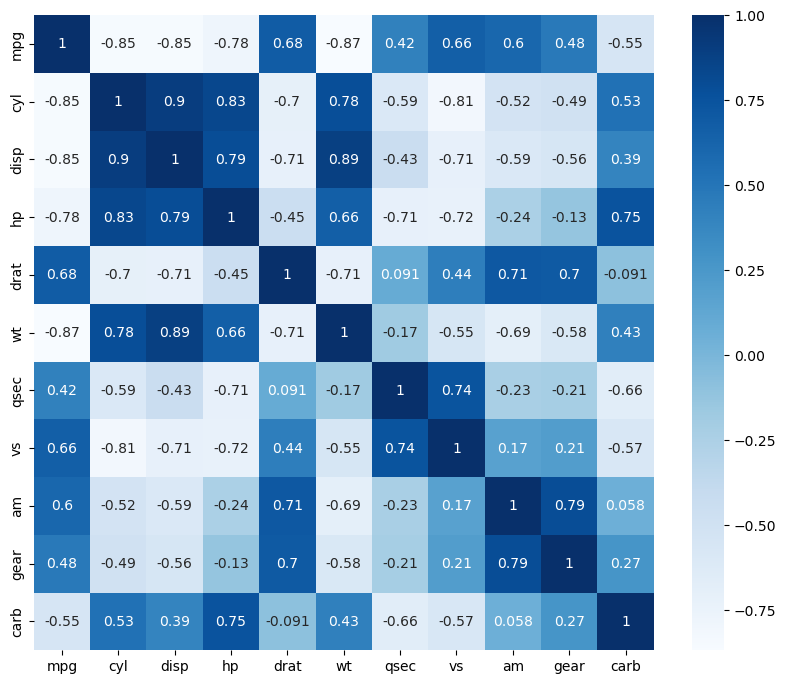

In [8]:
corr = df.corr()
plt.figure(figsize = (10, 8.25))
sns.heatmap(corr, annot = True, cmap = sns.color_palette("Blues", as_cmap=True))
plt.show()

ans. If we are taking values greater than or lesser than 0.7 to be strongly correlated. Then: <br><br>
Strongly positively correlated:
1. disp & cyl
2. hp & cyl
3. wt & cyl
4. hp & disp
5. wt & disp
6. carb & hp
7. am & drat
8. vs & qsec
9. gear & am <br>

Strongly negatively correlated:
1. cyl & mpg
2. disp & mpg
3. hp & mpg
4. wt & mpg
5. vs & cyl
6. drat & disp
7. vs & disp
8. qsec & hp
9. vs & hp
10. wt & drat

------------

**problem 2. Split the dataset in the ratio 8:2 and set random state=4. The dependent variable is mpg.**

In [12]:
X = df.drop(['mpg'], axis = 1)
y = df[['mpg']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

-----------

**problem 3. Perform standardisation on the train data of independent variables using StandardScaler() and fit transform. Further, use transform on the test data of independent variables to scale it.**

In [39]:
scaler = StandardScaler()
standardised_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

---------

**problem 4. Fit multiple linear regression and obtain R2 and MSE value for the test data.**

In [43]:
model = LinearRegression()
model.fit(standardised_X_train, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(scaled_X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 Score: {:.3f}'.format(r2))
print('MSE: {:.3f}'.format(mse))

R2 Score: 0.634
MSE: 24.515


-------------

**problem 5. Fit Lasso regression and Ridge regression and obtain R2 and MSE value for the test data. Take the shrinkage parameter value as 1.**

In [49]:
lasso_model = Lasso(alpha = 1)
lasso_model.fit(standardised_X_train, y_train)

Lasso(alpha=1)

In [51]:
y_pred_lasso = lasso_model.predict(scaled_X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print('R2 Score (lasso): {:.3f}'.format(r2_lasso))
print('MSE (lasso): {:.3f}'.format(mse_lasso))

R2 Score (lasso): 0.700
MSE (lasso): 20.120


In [53]:
ridge_model = Ridge(alpha = 1)
ridge_model.fit(standardised_X_train, y_train)

Ridge(alpha=1)

In [55]:
y_pred_ridge = ridge_model.predict(scaled_X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print('R2 Score (ridge): {:.3f}'.format(r2_ridge))
print('MSE (ridge): {:.3f}'.format(mse_ridge))

R2 Score (ridge): 0.726
MSE (ridge): 18.384


-------------

**problem 6. Print the lasso coefficient values and identify which coefficients are shrunk to 0. Similarly, print the ridge coefficients and identify which coefficients are very close to 0?**

In [57]:
feature_names = X.columns

In [59]:
lasso_coef = lasso_model.coef_
print(lasso_coef)

[-1.38407122 -0.         -0.38216937  0.         -2.26957886  0.
  0.          0.          0.         -0.        ]


In [78]:
# to get the features who's coefficients got shrunk to 0
idx = []
for value in range(len(lasso_coef)):
    if lasso_coef[value] == 0 or lasso_coef[value] == -0:
        idx.append(value)
res = [feature_names[i] for i in idx]   
alt = [feature_names[i] for i in range(len(feature_names)) if i not in idx]   
print("Features who's coefficients got shrunk to 0 -",res)
print("Features who's coefficients did not get shrunk to 0 (a.k.a, key predictors) -",alt)

Features who's coefficients got shrunk to 0 - ['disp', 'drat', 'qsec', 'vs', 'am', 'gear', 'carb']
Features who's coefficients did not get shrunk to 0 (a.k.a, key predictors) - ['cyl', 'hp', 'wt']


In [63]:
ridge_coef = ridge_model.coef_.flatten()
print(ridge_coef)

[-1.3618177   0.76470759 -0.96974073  0.01963566 -3.0486594   0.22040229
  0.17530473 -0.09400287  0.5059479  -0.33364126]


In [69]:
# to get the features who's coefficients got very close to 0
threshold = 0.1
idx = []
for value in range(len(ridge_coef)):
    if np.abs(ridge_coef[value]) < threshold:
        idx.append(value)
res = [feature_names[i] for i in idx]   
print("Features who's coefficients got very close to 0 -",res)

Features who's coefficients got very close to 0 - ['drat', 'am']


-----------------

**problem 7. From this analysis, conclude about the best model to be considered by you and which variables are the key predictors for mpg?**

ans. I consider the Ridge Regression model to be the best among the three models because it achieved the lowest MSE (18.384) and the highest R2 score (0.726). To identify the key predictors, lasso regression can be utilised. Lasso regression is a linear regression method that applies L1 regularization, shrinking some coefficients to zero. This results in automatic feature selection. The key features or predictors for 'mpg' can be identified as the predictors whose coefficients were not shrunk to 0 during the fitting of the Lasso Regression model. These predictors are 'cyl', 'hp' and 'wt'.